In [1]:
# include path to RoboCOP directory
import sys
sys.path.insert(0, '../pkg/')
import matplotlib.pyplot as plt
from robocop_diff import nuc_diff_map, tf_diff_map, get_diff_tfs, annotate_nucs
from robocop_diff.robocop_diff_plot import plot_diff_cop

We first ran RoboCOP on 5 separate MNase-seq data sets of cadmium treatment. Here are the names of the five RoboCOP output directories.

In [2]:
dirname1 = '../../../robocop_cd_DM504_Chr1_16/'
dirname2 = '../../../robocop_cd_DM505_Chr1_16_new/'
dirname3 = '../../../robocop_cd_DM506_Chr1_16_new/'
dirname4 = '../../../robocop_cd_DM507_Chr1_16/'
dirname5 = '../../../robocop_cd_DM508_Chr1_16/'
dirnames = [dirname1, dirname2, dirname3, dirname4, dirname5]

In [3]:
# output directory for DynaCOP output
outdir = '../../../robocop_diff_cd_DM504_DM505_DM506_DM507_DM508/'

## Create nucleosome linkage map

Create nucleosome linkage map by calling ```nuc_map_multiple```. The function first calls nucleosome dyads individually from the RoboCOP outputs. It then links the nucleosomes across the outputs to form a genome-wide nucleosome map for the given sets of data. Note that the nucleosomes are linked with an assumption that there exists an order in the set out RoboCOP outputs. For example, in our case we have a time series experiment of cadmium treatment of yeast cells. In case there is no order, the dirnames need to be provided in a sequence that the users seem fit.

In [4]:
nuc_df = nuc_diff_map.nuc_map_multiple(dirnames, outdir)  

Columns of ```nuc_df```:

* **chr:** chromosome

* **dyadX:** nucleosome dyad; the dyad position in different RoboCOP outputs are denoted as dyadA, dyadB,...

* **occupancyX:** Nucleosome posterior as predicted by RoboCOP; the occupancy in the different data sets are denoted as occupancyA, occupancyB,...

* **pdyadX:** Nucleosome dyad posterior as predicted by RoboCOP; the dyaad posterior is denoted as pdyadA, pdyadB, ...

* **shift_XY:** Shift in nucleosome dyad between two consecutive RoboCOP outputs. Shift calculated as dyadY - dyadX

In [5]:
nuc_df.head()

,chr,dyadA,dyadB,occupancyA,occupancyB,pdyadA,pdyadB,shift_AB,dyadC,occupancyC,...,pdyadC,dyadD,occupancyD,shift_CD,pdyadD,dyadE,occupancyE,shift_DE,pdyadE,name
0,chrI,229.0,216.0,0.999942,0.984759,0.315144,0.182249,-13.0,230.0,0.999783,...,0.334864,222.0,0.975525,-8.0,0.163414,229.0,0.999758,7.0,0.251794,nuc_0
1,chrI,389.0,389.0,0.999969,0.996902,0.270605,0.136205,0.0,404.0,0.997403,...,0.170422,385.0,0.997682,-19.0,0.277604,381.0,0.999992,-4.0,0.275946,nuc_1
2,chrI,866.0,864.0,0.999993,0.999912,0.427427,0.518984,-2.0,864.0,0.999965,...,0.636082,864.0,0.999907,0.0,0.462330,865.0,0.999345,1.0,0.277971,nuc_2
3,chrI,1179.0,NaN,0.889191,NaN,0.272899,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nuc_3
4,chrI,1582.0,1588.0,0.999886,0.999997,0.310744,0.247687,6.0,1580.0,0.998400,...,0.277184,1582.0,0.999767,2.0,0.149365,1580.0,0.997392,-2.0,0.153465,nuc_4


## Create TF difference table

Get TF binding sites that bind with probability > 0.1 in at least one of the RoboCOP outputs.

In [6]:
tf_sites = get_diff_tfs.get_tf_diff(dirnames, outdir) 

Columns of ```tf_sites```:
    
* **chr:** chromosome
        
* **start:** start of TF binding site
        
* **end**: end of TF binding site
        
* **scoreX:** posterior of TF binding at predicted by RoboCOP
        
* **TF:** name of TF

In [7]:
tf_sites.head()

,chr,start,end,scoreA,scoreB,scoreC,scoreD,scoreE,TF
0,chrXII,460398.0,460405.0,1.0,0.0,0.0,0.0,0.0,YRM1
1,chrXII,460370.0,460377.0,1.0,0.0,0.0,0.0,0.0,YRM1
2,chrXII,459967.0,459974.0,1.0,0.0,0.0,0.0,0.0,YRM1
3,chrXII,459860.0,459867.0,1.0,0.0,0.0,0.0,0.0,YRM1
4,chrXII,460384.0,460391.0,1.0,0.0,0.0,0.0,0.0,YRM1


# Plot DynaCOP output for a segment

Output saved: ../../../robocop_diff_cd_DM504_DM505_DM506_DM507_DM508/figures/MET10.pdf


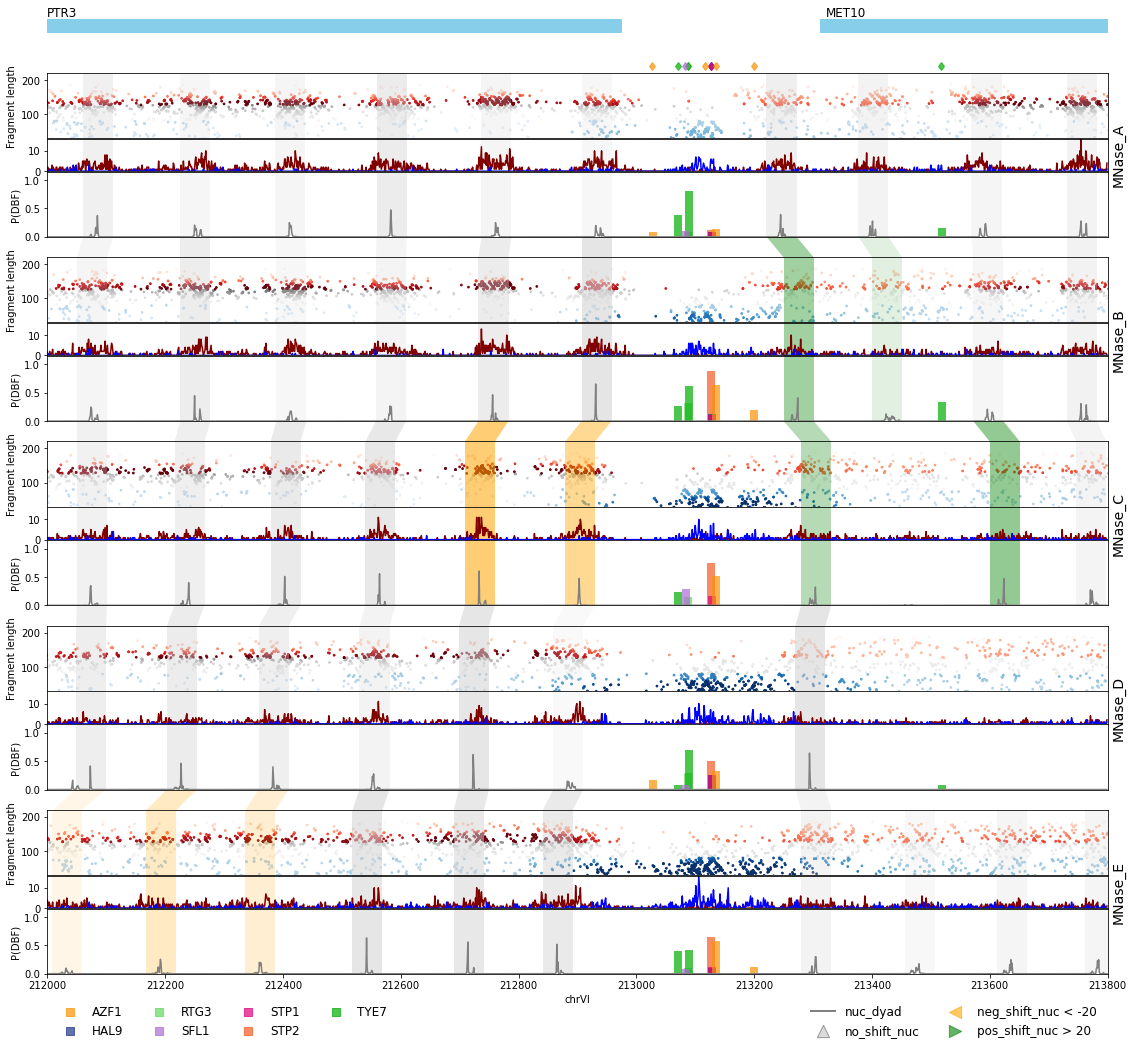

In [8]:
chrm = 'chrVI'
start = 212000                                                                                                                                                                         
end = 213800                                                                                                                                                                         
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='MET10.pdf')

## Nucleosome clustering

In [9]:
# classify by shift type
nuc_df = nuc_diff_map.cluster_nuc_shifts(nuc_df)
# cluster by nucleosome posterior
nuc_df = nuc_diff_map.cluster_nucs_occ_pdyad(nuc_df, k=4)

* **shift_type:** no_shift, depleted, linear_shift, nonlinear_shift
* **occ_cluster:** cluster number 

In [10]:
nuc_df.head()

,chr,dyadA,dyadB,occupancyA,occupancyB,pdyadA,pdyadB,shift_AB,dyadC,occupancyC,...,occupancyE,shift_DE,pdyadE,name,shiftAB,shiftBC,shiftCD,shiftDE,shift_type,occ_cluster
0,chrI,229.0,216.0,0.999942,0.984759,0.315144,0.182249,-13.0,230.0,0.999783,...,0.999758,7.0,0.251794,nuc_0,-13.0,14.0,-8.0,7.0,no_shift,2
1,chrI,389.0,389.0,0.999969,0.996902,0.270605,0.136205,0.0,404.0,0.997403,...,0.999992,-4.0,0.275946,nuc_1,0.0,15.0,-19.0,-4.0,no_shift,2
2,chrI,866.0,864.0,0.999993,0.999912,0.427427,0.518984,-2.0,864.0,0.999965,...,0.999345,1.0,0.277971,nuc_2,-2.0,0.0,0.0,1.0,no_shift,3
3,chrI,1179.0,NaN,0.889191,NaN,0.272899,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,nuc_3,NaN,NaN,NaN,NaN,depleted,2
4,chrI,1582.0,1588.0,0.999886,0.999997,0.310744,0.247687,6.0,1580.0,0.998400,...,0.997392,-2.0,0.153465,nuc_4,6.0,-8.0,2.0,-2.0,no_shift,2


## Annotate nucleosomes as +1, -1, promoter, gene body and intergenic nucleosomes

We take annotated +1 and -1 nucleosomes reported by Chereji et al., 2018 to annotate our linked nucleosomes.

In [11]:
plus_minus_nucs_file = 'plus_minus_nucs.csv'
nuc_df = annotate_nucs.ann_nucs(nuc_df, plus_minus_nucs_file, outdir)

New columns:

* **+1_nuc:**: Gene name if nucleosome is +1 nucleosome for the gene
* **-1_nuc:**: Gene name if nucleosome is -1 nucleosome for the gene
* **Promoter_nuc:** Gene name if nucleosome lies within the promoter region for given gene
* **ORF_transcript_nuc:** Gene name if nucleosome lies within the ORF or transcript boundary
* **Downstream_nuc:** Gene name if nucleosome lies in downstream region of the gene

In [12]:
nuc_df.head()

,chr,dyadA,dyadB,occupancyA,occupancyB,pdyadA,pdyadB,shift_AB,dyadC,occupancyC,...,dyadE,occupancyE,shift_DE,pdyadE,name,+1_nuc,-1_nuc,Promoter_nuc,ORF_transcript_nuc,Downstream_nuc
0,chrI,229.0,216.0,0.999942,0.984759,0.315144,0.182249,-13.0,230.0,0.999783,...,229.0,0.999758,7.0,0.251794,nuc_0,NaN,NaN,NaN,NaN,NaN
1,chrI,389.0,389.0,0.999969,0.996902,0.270605,0.136205,0.0,404.0,0.997403,...,381.0,0.999992,-4.0,0.275946,nuc_1,NaN,NaN,NaN,NaN,NaN
2,chrI,866.0,864.0,0.999993,0.999912,0.427427,0.518984,-2.0,864.0,0.999965,...,865.0,0.999345,1.0,0.277971,nuc_2,NaN,NaN,NaN,NaN,NaN
3,chrI,1179.0,NaN,0.889191,NaN,0.272899,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,nuc_3,NaN,NaN,NaN,NaN,YAL068C
4,chrI,1582.0,1588.0,0.999886,0.999997,0.310744,0.247687,6.0,1580.0,0.998400,...,1580.0,0.997392,-2.0,0.153465,nuc_4,NaN,NaN,NaN,NaN,YAL068C


## Gene directional approach

Nucleosome features for each gene: +1, -1 and gene body nucleosomes. These features for each gene are used to cluster genes in order to obtain gene clusters exhibiting similar nucleosome dynamics.

In [13]:
gene_nucs = nuc_diff_map.cluster_gene_nucs(nuc_df, outdir, 'plus_minus_nucs.csv', k=8)

Columns in gene nucleosomes:

* **p1_shift_XY:** Shift of +1 nucleosome between data sets X and Y

* **m1_shift_XY:** Shift of -1 nucleosome between data sets X and Y

* **p1_pdyadX:** +1 nucleosome posterior in data set X

* **m1_pdyadX:** -1 nucleosome posterior in data set X

* **orf_pdyadX:** Average nucleosome dyad posterior in gene/transcript

* **cluster:** Assigned cluster


In [14]:
gene_nucs.head()

,p1_shift_AB,p1_shift_BC,p1_shift_CD,p1_shift_DE,m1_shift_AB,m1_shift_BC,m1_shift_CD,m1_shift_DE,p1_pdyadA,p1_pdyadB,...,m1_pdyadB,m1_pdyadC,m1_pdyadD,m1_pdyadE,orf_pdyadA,orf_pdyadB,orf_pdyadC,orf_pdyadD,orf_pdyadE,cluster
gene,,,,,,,,,,,,,,,,,,,,,
YAL001C,7.0,-0.0,-1.0,3.0,10.0,-0.0,-9.0,9.0,0.447447,0.230651,...,0.312737,0.341480,0.261071,0.598655,0.323751,0.327657,0.330314,0.335367,0.324313,4
YAL002W,5.0,-6.0,5.0,10.0,21.0,0.0,4.0,6.0,0.460655,0.397216,...,0.267551,0.426574,0.294886,0.130260,0.395948,0.304407,0.305774,0.343116,0.329954,1
YAL003W,10.0,-10.0,-71.0,0.0,-8.0,NaN,NaN,-6.0,0.247866,0.430759,...,0.250443,NaN,0.455934,0.216981,0.135086,0.203688,0.159156,0.232781,0.253109,6
YAL005C,8.0,NaN,NaN,6.0,-10.0,10.0,71.0,-0.0,0.405285,0.250443,...,0.430759,0.276569,0.369917,0.337704,0.370470,0.294824,0.137953,0.289722,0.271661,6
YAL007C,-7.0,7.0,8.0,-0.0,-0.0,-1.0,2.0,-14.0,0.281245,0.242525,...,0.352263,0.238988,0.218626,0.182860,0.299204,0.349682,0.345075,0.413458,0.351676,1


### TFs that are differentially enriched in the promoter region of the gene clusters 

In [15]:
tf_set = get_diff_tfs.get_tf_clusters(gene_nucs, dirnames, outdir, 'plus_minus_nucs.csv')

Table with the number of columns equal to the number of clusters identified using ```cluster_gene_nucs```. Each row corresponds to one TF. Each cell represents the fraction of genes and in the given cluster that have differential activity of the TF of that row.

In [16]:
tf_set.head()

,1,2,3,4,5,6,7,8
ABF1,11.306533,7.050093,9.423233,12.380952,9.917355,9.432146,11.016949,8.035714
ASG1,19.849246,7.513915,9.991877,19.761905,9.917355,10.009625,19.491525,8.928571
DAL82,8.542714,4.359926,6.742486,11.190476,4.752066,5.101059,16.949153,6.250000
GAL4,13.316583,4.638219,8.204712,15.238095,6.714876,6.833494,21.186441,6.250000
GCR1,16.834171,6.957328,9.748172,15.476190,6.818182,6.544755,24.576271,5.357143
